Epoch 1/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8722 - loss: 0.4522 - val_accuracy: 0.9628 - val_loss: 0.1278
Epoch 2/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9626 - loss: 0.1253 - val_accuracy: 0.9735 - val_loss: 0.0947
Epoch 3/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9746 - loss: 0.0842 - val_accuracy: 0.9732 - val_loss: 0.0951
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9666 - loss: 0.1051
Test Accuracy: 0.97
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Enter an index between 0 and 9999 to predict:  50


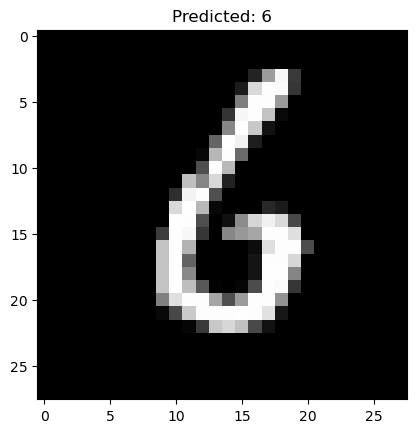

In [8]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = Sequential([
    Dense(128, activation='relu', input_shape=(28 * 28,)),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3, batch_size=32, validation_split=0.1)

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

predictions = model.predict(x_test)

max_index = len(x_test) - 1

try:
    index = int(input(f"Enter an index between 0 and {max_index} to predict: "))

    if 0 <= index <= max_index:
        plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
        plt.title(f"Predicted: {predictions[index].argmax()}")
        plt.show()
    else:
        print(f"Invalid index! Please select an index between 0 and {max_index}.")

except ValueError:
    print("Invalid input! Please enter a valid integer index.")
